In [1]:
# Import packages required
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def func_model_training(model,x,y):
    num_epochs=2000
    epoch_iter=1
    lossm_val=0
    minimal_ratio=0
    while(True):
        predicted_y = model(x)
        loss=loss_function(predicted_y,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        grad_all=0.0
        for p in model.parameters():
            grad=0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        total_params=sum(p.numel() for p in model.parameters())
        if(grad_norm<0.001):
            print('grad_norm got converged')
            predicted_y = model(x)
            lossm=loss_function(predicted_y,y)
            H = torch.zeros((total_params, total_params))
            # Calculate Jacobian w.r.t. model parameters
            J = torch.autograd.grad(lossm, list(model.parameters()), create_graph=True)
            J = torch.cat([e.flatten() for e in J]) # flatten
            for i in range(total_params):
                result = torch.autograd.grad(J[i], list(model.parameters()), retain_graph=True)
                H[i] = torch.cat([r.flatten() for r in result]) # flatten
            H_eig=torch.symeig(H).eigenvalues
            positive_count=0
            for i in H_eig.tolist():
                if(i>0):
                    positive_count+=1
            minimal_ratio = positive_count/H.shape[0]
            print('minimal_ratio',minimal_ratio)
            print('loss',lossm.data.detach().numpy())
            lossm_val=lossm.data.detach().numpy()
            break
        if(epoch_iter>=num_epochs):
            print('grad_norm is not converged but epochs reached max')
            break
        epoch_iter +=1    
    return lossm_val,minimal_ratio
        

In [3]:
x=np.expand_dims(np.arange(-1.5, 1.5, 0.01),1) 
y=np.sin(5*(np.pi)*x)/(5*(np.pi)*x)

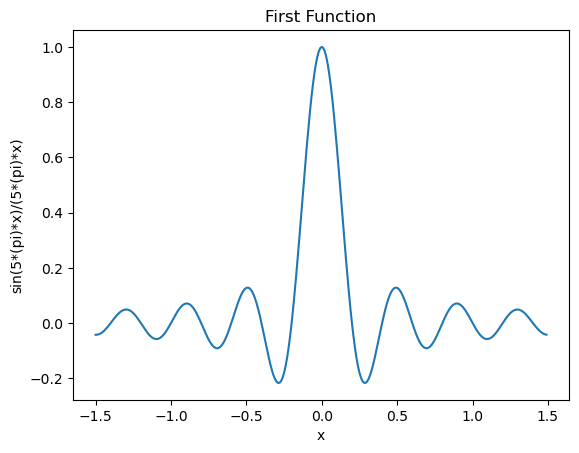

In [4]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.plot(x,y)
plt.title("First Function")
plt.xlabel("x")
plt.ylabel("sin(5*(pi)*x)/(5*(pi)*x)")
plt.show()

In [5]:

class NN1(nn.Module):
    def __init__(self):
        super(NN1, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 5),
            nn.LeakyReLU(),
            nn.Linear(5, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 10),
            nn.LeakyReLU(),
            nn.Linear(10, 8),
            nn.LeakyReLU(),
            nn.Linear(8, 5),
            nn.LeakyReLU(),
            nn.Linear(5, 1)
        )

    def forward(self, x):
        return self.layers(x)


In [6]:
loss_list=[]
minimal_ratio_list=[]
for i in range(50):
    nn1=NN1()
    num_epochs=2000
    optimizer = torch.optim.Adam(nn1.parameters(), lr = 1e-3, weight_decay = 1e-4)
    loss_function = nn.MSELoss()
    loss, minimal_ratio= func_model_training(nn1, x, y)
    loss_list.append(loss)
    minimal_ratio_list.append(minimal_ratio)


grad_norm got converged


/var/folders/31/1l0_0xfn1yd1lyhjq3_2pvb00000gn/T/ipykernel_26381/645697982.py:32: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_2a19nf9hj1/croot/pytorch_1675190251927/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:3041.)
  H_eig=torch.symeig(H).eigenvalues


minimal_ratio 0.520259319286872
loss 0.0024298495
grad_norm got converged
minimal_ratio 0.5024311183144247
loss 0.061322715
grad_norm got converged
minimal_ratio 0.5235008103727715
loss 0.001715296
grad_norm is not converged but epochs reached max
grad_norm got converged
minimal_ratio 0.5008103727714749
loss 0.06131204
grad_norm got converged
minimal_ratio 0.5040518638573744
loss 0.061304875
grad_norm got converged
minimal_ratio 0.5024311183144247
loss 0.061305776
grad_norm got converged
minimal_ratio 0.5186385737439222
loss 0.0023501485
grad_norm got converged
minimal_ratio 0.5024311183144247
loss 0.061310202
grad_norm is not converged but epochs reached max
grad_norm got converged
minimal_ratio 0.5040518638573744
loss 0.061298452
grad_norm got converged
minimal_ratio 0.5348460291734197
loss 0.0014253259
grad_norm got converged
minimal_ratio 0.4959481361426256
loss 0.061310902
grad_norm got converged
minimal_ratio 0.5040518638573744
loss 0.06130937
grad_norm got converged
minimal_rati

In [7]:
print(loss_list)
print(minimal_ratio_list)

[array(0.00242985, dtype=float32), array(0.06132272, dtype=float32), array(0.0017153, dtype=float32), 0, array(0.06131204, dtype=float32), array(0.06130487, dtype=float32), array(0.06130578, dtype=float32), array(0.00235015, dtype=float32), array(0.0613102, dtype=float32), 0, array(0.06129845, dtype=float32), array(0.00142533, dtype=float32), array(0.0613109, dtype=float32), array(0.06130937, dtype=float32), array(0.06131056, dtype=float32), array(0.0613099, dtype=float32), array(0.0612686, dtype=float32), array(0.00210022, dtype=float32), array(0.00130609, dtype=float32), array(0.06130923, dtype=float32), array(0.06130618, dtype=float32), array(0.06131036, dtype=float32), array(0.06125177, dtype=float32), array(0.06128768, dtype=float32), 0, array(0.06124766, dtype=float32), array(0.06131006, dtype=float32), array(0.06130291, dtype=float32), array(0.06129797, dtype=float32), array(0.06131802, dtype=float32), array(0.06132538, dtype=float32), array(0.06130958, dtype=float32), array(0.0

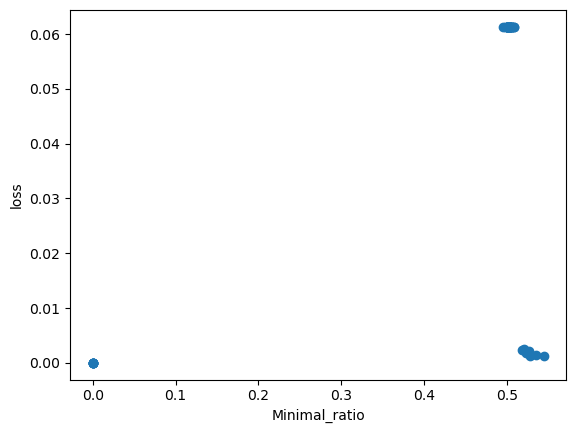

In [8]:
plt.scatter(minimal_ratio_list,loss_list)
plt.xlabel("Minimal_ratio")
plt.ylabel("loss")
plt.show()